In [20]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import statistics
from numpy import linalg as LA

def get_laplacians(x, n_agents, metric, rr, ra, n_neighbors):
    A_r = np.zeros((n_agents, n_agents))
    D_r = np.zeros((n_agents, n_agents))
    A_a = np.zeros((n_agents, n_agents))
    D_a = np.zeros((n_agents, n_agents))
    
    if metric == "dist":
        for i in range(n_agents):
            for j in range(n_agents):
                if i == j:
                    continue
                dist = np.sum((x[j] - x[i]) ** 2) ** 0.5
                if dist < rr:
                    A_r[i, j] = 1
                    A_r[j, i] = 1
                    D_r[i, i] += 1
                elif dist < ra:
                    A_a[i, j] = 1
                    A_a[j, i] = 1
                    D_a[i, i] += 1
    elif metric == "nn":
        for i in range(n_agents):
            dists = np.zeros((n_agents))
            for j in range(n_agents):
                if i == j:
                    dists[j] = world_dim ** 2 + world_dim ** 2
                else:
                    dists[j] = np.sum((x[j] - x[i]) ** 2) ** 0.5
            indices = np.argsort(dists)[:n_neighbors]
            for nn in range(n_neighbors):
                idx = indices[nn]
                dist = dists[idx]
                if dist < rr:
                    A_r[i, idx] = 1
                    A_r[idx, i] = 1
                    D_r[i, i] += 1
                else:
                    A_a[i, j] = 1
                    A_a[j, i] = 1
                    D_a[i, i] += 1
                
    return D_r, A_r, D_a, A_a

def get_fiedler_ev(mtx):
    eig_vals = LA.eigvals(mtx)
    eig_vals = np.sort(eig_vals)
    return eig_vals[1]

<IPython.core.display.Javascript object>


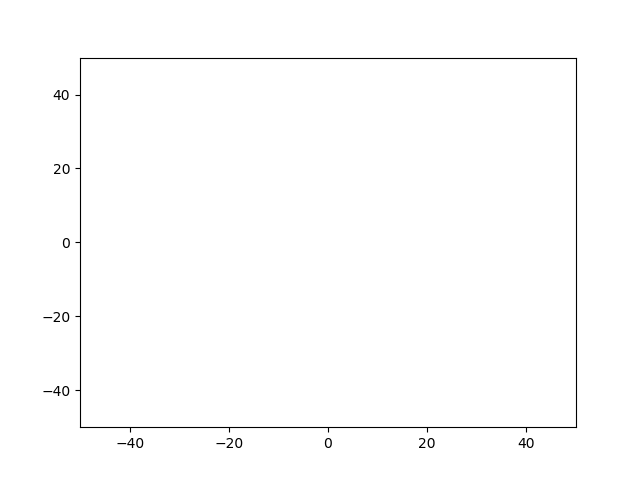

KeyboardInterrupt: 

In [23]:
n_agents = 25
world_dim = 100
M = world_dim / 4
n_neighbors = 5
metric = "nn" # "nn"
n_timesteps = 50
x = 2 * M * (np.random.random((n_agents, 2)) - 0.5)
radius_r = 5
radius_a = 15

fiedler_r = []
avg_deg_r = []
fiedler_a = []
avg_deg_a = []

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()
fig.show()
for trial in range(n_timesteps):
    ax.clear()
    ax.scatter(x[:,0], x[:,1])
    ax.set_xlim((-world_dim / 2,world_dim / 2))
    ax.set_ylim((-world_dim / 2,world_dim / 2))
    fig.canvas.draw()

    D_r, A_r, D_a, A_a = get_laplacians(x, n_agents, metric, radius_r, radius_a, n_neighbors)
    L_r = D_r - A_r
    L_a = D_a - A_a
    x += np.matmul(-L_r, x) + np.matmul(L_a, x)
    fiedler_r.append(get_fiedler_ev(L_r))
    fiedler_a.append(get_fiedler_ev(L_a))
    avg_deg_r.append(np.mean(D_r.diagonal()))
    avg_deg_a.append(np.mean(D_a.diagonal()))
    
    plt.pause(.25)
        


<IPython.core.display.Javascript object>


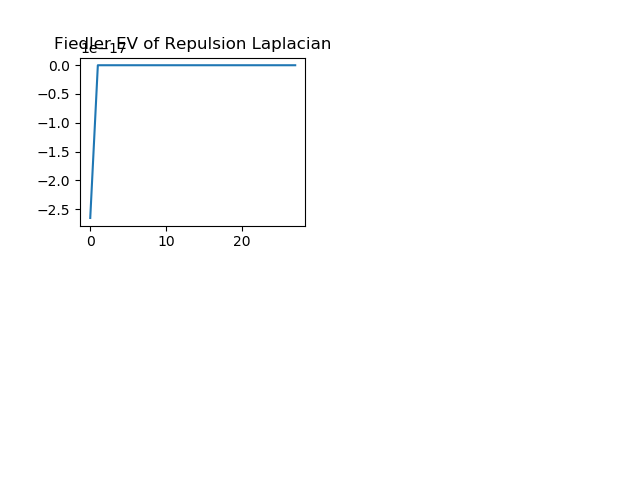

/home/wesack/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<IPython.core.display.Javascript object>


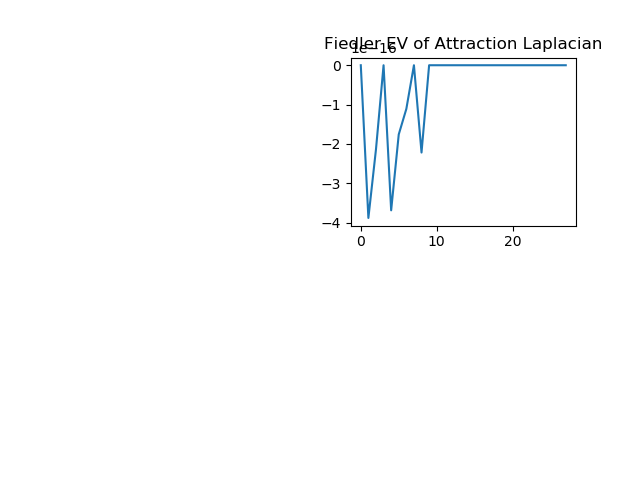

<IPython.core.display.Javascript object>


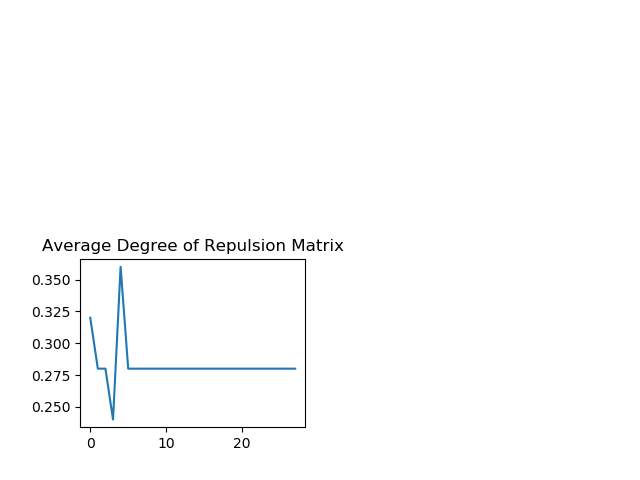

<IPython.core.display.Javascript object>


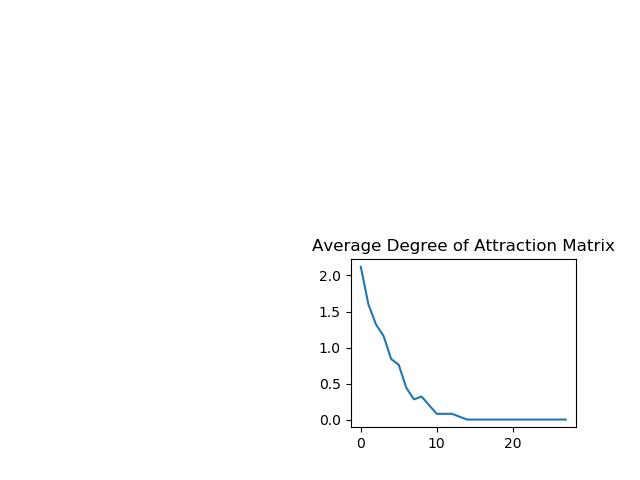

Text(0.5,1,'Average Degree of Attraction Matrix')

In [16]:
fig = plt.figure()
ax = fig.add_subplot(2,2,1)
ax.plot(fiedler_r)
ax.set_title("Fiedler EV of Repulsion Laplacian")

fig = plt.figure()
ax = fig.add_subplot(2,2,2)
ax.plot(fiedler_a)
ax.set_title("Fiedler EV of Attraction Laplacian")

fig = plt.figure()
ax = fig.add_subplot(2,2,3)
ax.plot(avg_deg_r)
ax.set_title("Average Degree of Repulsion Matrix")

fig = plt.figure()
ax = fig.add_subplot(2,2,4)
ax.plot(avg_deg_a)
ax.set_title("Average Degree of Attraction Matrix")